In [159]:
import pydicom as dicom
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from functions import *
from stripthem import *

# Processing

In [397]:
path = ('D:\\Uni\\mri\\SK_MRI\\MS_dataset_full\\MS\\01_10\\png')

In [398]:
im = 'IM000010.png'

In [399]:
npat = os.path.join(path,im)

In [400]:
img = cv2.imread(os.path.join(path,im))

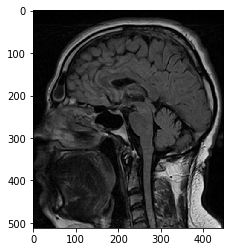

In [401]:
view(img)

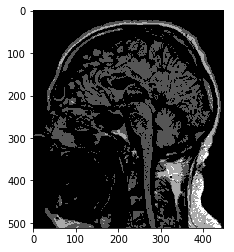

In [431]:
n = 4# Number of levels of quantization

indices = np.arange(0,256)   # List of all colors 
divider = np.linspace(0,255,n+1)[1] # we get a divider
quantiz = np.int0(np.linspace(0,255,n)) # we get quantization colors
color_levels = np.clip(np.int0(indices/divider),0,n-1) # color levels 0,1,2..
palette = quantiz[color_levels] # Creating the palette
im2 = palette[img]  # Applying palette on image
im2 = cv2.convertScaleAbs(im2) # Converting image back to uint8
nblack = np.sum(im2 == 0)
view(im2)

In [432]:
#gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


In [433]:
while (nblack /(im2.shape[0]*im2.shape[1]*im2.shape[2]) * 100) > 55:
    n += 1
    divider = np.linspace(0,255,n+1)[1] # we get a divider
    quantiz = np.int0(np.linspace(0,255,n)) # we get quantization colors
    color_levels = np.clip(np.int0(indices/divider),0,n-1) # color levels 0,1,2..
    palette = quantiz[color_levels] # Creating the palette
    im2 = palette[img]  # Applying palette on image
    im2 = cv2.convertScaleAbs(im2) # Converting image back to uint8
    nblack = np.sum(im2 == 0)
    print(n)

5
6


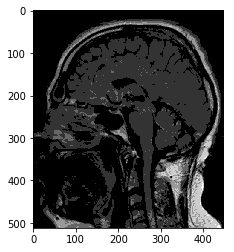

In [434]:
view(im2)

In [435]:
gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

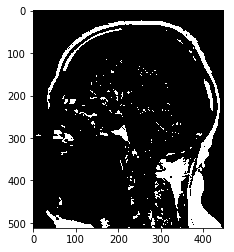

In [436]:
first = gray > 80
view(first)

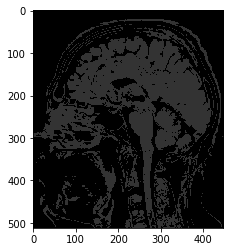

In [437]:
nofat = applymask(im2, ~first)
view(nofat)

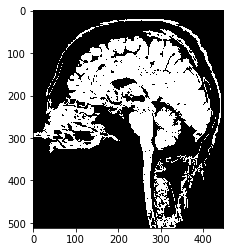

In [438]:
gray = cv2.cvtColor(nofat, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

brain_mask = remgar(thresh)
brain_mask = np.uint8(brain_mask)
view(brain_mask)

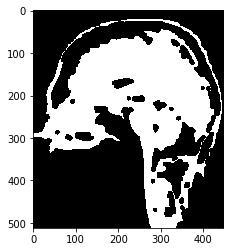

In [439]:

closing = close(brain_mask, 10)
view(closing)

In [440]:
import functions

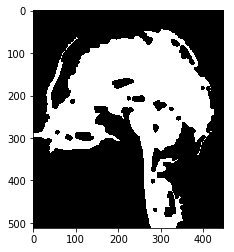

In [441]:
taks = tophat(closing, kernel(5))
view(taks)

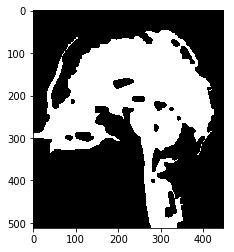

In [442]:
closing = close(taks, 10)
view(closing)

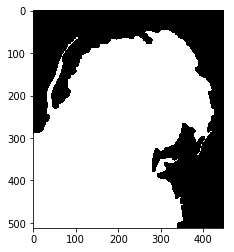

In [443]:
fill = floodfill(np.uint8(closing))
view(fill)

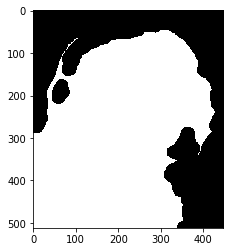

In [444]:
closing3 = functions.close(fill, 30)
view(closing3)

In [445]:
# dilate = cv2.dilate(fill, kernel(20))
# view(dilate)

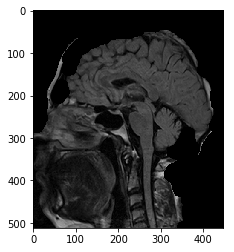

In [446]:
result2 = applymask(img, closing3)
view(result2)

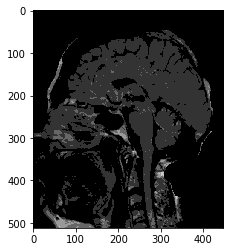

In [447]:
indices = np.arange(0,256)   # List of all colors 

divider = np.linspace(0,255,n+1)[1] # we get a divider

quantiz = np.int0(np.linspace(0,255,n)) # we get quantization colors

color_levels = np.clip(np.int0(indices/divider),0,n-1) # color levels 0,1,2..

palette = quantiz[color_levels] # Creating the palette

im3 = palette[result2]  # Applying palette on image

im3 = cv2.convertScaleAbs(im3) # Converting image back to uint8

view(im3)

In [448]:
gray = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

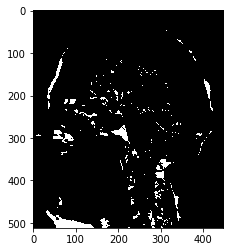

In [449]:
first = gray > 80
view(first)

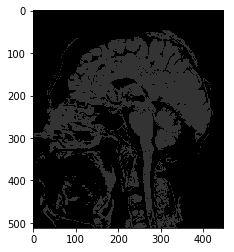

In [450]:
nofat = applymask(im3, ~first)
view(nofat)

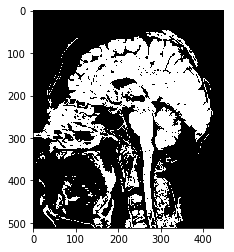

In [451]:
gray = cv2.cvtColor(nofat, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

# brain_mask = remgar(thresh)
# brain_mask = np.uint8(brain_mask)
view(thresh)

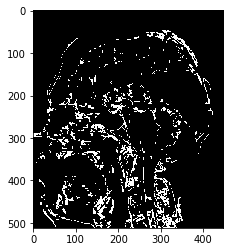

In [452]:
nolines = top_hat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel(8))
view(nolines)

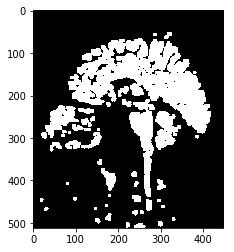

In [453]:
clean = thresh - nolines
view(clean)

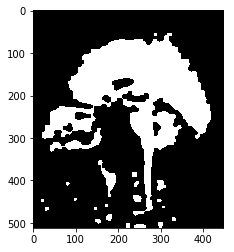

In [454]:
fill2 = close(clean, 10)
view(fill2)

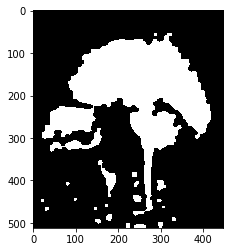

In [455]:
fill3 = floodfill(fill2)
view(fill3)

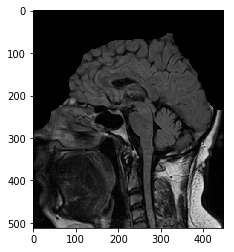

In [468]:
mm = remgar(fill3)
noline = tophat(np.uint8(mm), kernel(5))
view(noline)
argh = close(mm, 80)
ugh = floodfill(argh)
so = applymask(img, ugh)

view(so)

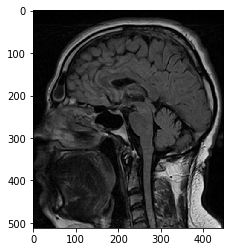

In [460]:
view(img)